In [1]:
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

In [ ]:
trans_cifar = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trans_cifar = transforms.Compose([transforms.ToTensor()])
trans_cifar1 = transforms.Compose([transforms.Resize (64), transforms.ToTensor()])
dataset0 = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=None)
dataset = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=trans_cifar)
dataset1 = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=trans_cifar1)

In [ ]:
# transformed = dataset1.transforms(dataset1.data[0],transforms.ToTensor())
# # print(type(ztransformed))
# # print(min(transformed),max(transformed))
# # print(len(transformed))
# print(len(transformed[0][0]))
# for i in transformed[0]:
#     for j in i:
#         print(max(j).item(), min(j).item())
#         # for k in j:
#         #     print(k)
#         #     print('---------------')

In [ ]:
image = (dataset.data[0])
print(type(image))
plt.figure('1')
plt.imshow(image)

plt.figure('2')
plt.hist(image.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")
plt.show()
image = (dataset.data[0])
transform = transforms.Compose([
    transforms.ToTensor()
])

img_tr = transform(image)

img_np = np.array(img_tr)
plt.figure('3')
plt.hist(img_np.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")

image = (dataset.data[0])
img_tr = trans_cifar(image)

img_np = np.array(img_tr)
plt.figure('4')
plt.hist(img_np.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")

In [ ]:
trainloader1 = torch.utils.data.DataLoader(dataset1, shuffle = True,batch_size=4) 
trainloader = torch.utils.data.DataLoader(dataset, shuffle = True,batch_size=4)
dataiter1 = iter(trainloader1)
dataiter = iter(trainloader)

images1, _ = dataiter1.next()
images, _ = dataiter.next()

img1= utils.make_grid(images1)
img= utils.make_grid(images)

npimg = img.numpy()
npimg = np.transpose(npimg, (1, 2, 0))

plt.imshow(npimg)




In [ ]:
print(images1.shape)
m = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=4, stride=2, padding=1, bias = False)
# image=np.transpose((1, 2, 0))
# image=torch.tensor(images1)

output = m(images)
# print(output.shape)
# output = np.transpose(output.cpu().detach().numpy(),(0,2,3,1))
# print(output[0].shape)
# plt.imshow(output[0])
img= utils.make_grid(output)

npimg = img.numpy()
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)
plt.imshow(npimg)

In [ ]:
npimg1 = img1.numpy()
npimg1 = np.transpose(npimg1, (1, 2, 0))

plt.imshow(npimg1)


In [ ]:
torch.randn(32)

In [ ]:
worker_chosen_counter= [6 for i in range(5)]
plt.bar(range(len(worker_chosen_counter)),worker_chosen_counter)
plt.xlabel('worker number')
plt.ylabel('chosen counter')
plt.show()

In [ ]:
x = torch.tensor(3.,requires_grad=True)
print(x,",",x.grad)

In [ ]:
z = torch.tensor(2.,requires_grad=True)
print(z,",", z.grad)

In [ ]:
y = x.detach()**2 + z**3
print(y)
y.backward()

In [ ]:
s = x**4 + z**2
print(s)
s.backward()

In [ ]:
print(x.grad,z.grad)

In [ ]:
x.grad.zero_()

In [2]:
from gan_model import Discriminator, Generator, initialize_weights
from torch.utils.tensorboard import SummaryWriter

In [ ]:
netG = Generator().to("cuda:0")
netD1 = Discriminator().to("cuda:0")
netD2 = Discriminator().to("cuda:0")
input_d = torch.randn((2000,3,32,32)).to("cuda:0")
input_g = torch.randn((2000,128,1,1)).to("cuda:0")

output_disc = netD1(input_d)
output_gen = netG(input_g)

In [ ]:
output_disc.reshape(-1)

In [3]:
netG = Generator()
netD = Discriminator()

In [4]:
initialize_weights(netG)
initialize_weights(netD)
# print(netG.state_dict())

In [5]:
# torch.save(netG.state_dict(),'G1_init')
torch.save(netD.state_dict(),'D2_init')

In [ ]:
input_d = torch.randn((1,1,32,32))
torch.ones_like(input_d).shape

In [ ]:
torch.manual_seed(42)

In [ ]:
torch.randn(1, 1, 1,1)

In [ ]:
weight_sum = 0
for i, p in enumerate(netG.parameters()):
    output = sum(p.detach().cpu().numpy().flatten())
    print(output)
    weight_sum += output
print(weight_sum)

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_addons as tfa

In [ ]:
# tf.keras.layers.Conv2DTranspose(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding='valid',
#     output_padding=None,
#     data_format=None,
#     dilation_rate=(1, 1),
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

In [31]:
def Generator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2DTranspose(512, (4,4), strides=(1, 1),input_shape=(1, 1, 128), padding='valid', use_bias=False))
    model.add(layers.BatchNormalization(momentum=0.1))
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(512, (4,4), strides=(1, 1),input_shape=(1, 1, 128), padding='valid', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    # assert model.output_shape == (None, 14, 14, 64)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # assert model.output_shape == (None, 28, 28, 1)

    return model

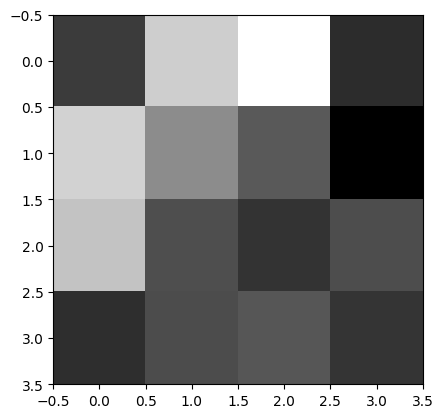

In [33]:
generator = Generator()

noise = tf.random.normal([1,1,1, 128])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')